In [66]:
import pandas as pd
df = pd.read_csv("bayern financials.csv")
print(df.head())

   year   commercial  matchday  broadcast  total revenue   profit
0   2018         350        92        211             653    52.5
1   2019         360        70        203             633     9.8
2   2020         345        11        254             610     1.9
3   2021         378       207         68             653    12.7
4   2022         419       204        121             744    35.7


In [68]:
print("Shape of the DataFrame:", df.shape)

print("\nData Types:")
print(df.dtypes)

print("\nDescriptive Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

Shape of the DataFrame: (6, 6)

Data Types:
year                int64
commercial          int64
matchday            int64
broadcast           int64
total revenue       int64
profit            float64
dtype: object

Descriptive Statistics:
             year   commercial    matchday   broadcast  total revenue   \
count     6.000000    6.000000    6.000000    6.000000        6.000000   
mean   2020.500000  378.833333  119.166667  178.333333      676.333333   
std       1.870829   33.831445   77.339296   69.373386       62.940183   
min    2018.000000  345.000000   11.000000   68.000000      610.000000   
25%    2019.250000  352.500000   75.500000  141.500000      638.000000   
50%    2020.500000  369.000000  111.500000  207.000000      653.000000   
75%    2021.750000  408.750000  185.750000  212.500000      721.250000   
max    2023.000000  421.000000  207.000000  254.000000      765.000000   

          profit  
count   6.000000  
mean   25.950000  
std    20.537161  
min     1.900000  

In [72]:
import pandas as pd

df = pd.read_csv("bayern financials.csv")
df.columns = df.columns.str.strip()  # clean extra spaces just in case

cols_to_numeric = ['commercial', 'matchday', 'broadcast', 'total revenue', 'profit']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.sort_values(by='year')

df['Revenue YoY Growth (%)'] = df['total revenue'].pct_change() * 100
df['Profit YoY Growth (%)'] = df['profit'].pct_change() * 100

df['Matchday %'] = (df['matchday'] / df['total revenue']) * 100
df['Broadcast %'] = (df['broadcast'] / df['total revenue']) * 100
df['Commercial %'] = (df['commercial'] / df['total revenue']) * 100

percentage_cols = ['Revenue YoY Growth (%)', 'Profit YoY Growth (%)', 'Matchday %', 'Broadcast %', 'Commercial %']
df[percentage_cols] = df[percentage_cols].round(2)

correlation = df[['matchday', 'broadcast', 'commercial', 'total revenue', 'profit']].corr()

print("\n--- Growth and Revenue Breakdown ---")
print(df[['year', 'total revenue', 'profit', 'Revenue YoY Growth (%)', 'Profit YoY Growth (%)']])

print("\n--- Revenue Stream Contributions (%) ---")
print(df[['year', 'Matchday %', 'Broadcast %', 'Commercial %']])

print("\n--- Correlation Matrix ---")
print(correlation)


--- Growth and Revenue Breakdown ---
   year  total revenue  profit  Revenue YoY Growth (%)  Profit YoY Growth (%)
0  2018            653    52.5                     NaN                    NaN
1  2019            633     9.8                   -3.06                 -81.33
2  2020            610     1.9                   -3.63                 -80.61
3  2021            653    12.7                    7.05                 568.42
4  2022            744    35.7                   13.94                 181.10
5  2023            765    43.1                    2.82                  20.73

--- Revenue Stream Contributions (%) ---
   year  Matchday %  Broadcast %  Commercial %
0  2018       14.09        32.31         53.60
1  2019       11.06        32.07         56.87
2  2020        1.80        41.64         56.56
3  2021       31.70        10.41         57.89
4  2022       27.42        16.26         56.32
5  2023       17.12        27.84         55.03

--- Correlation Matrix ---
               ma

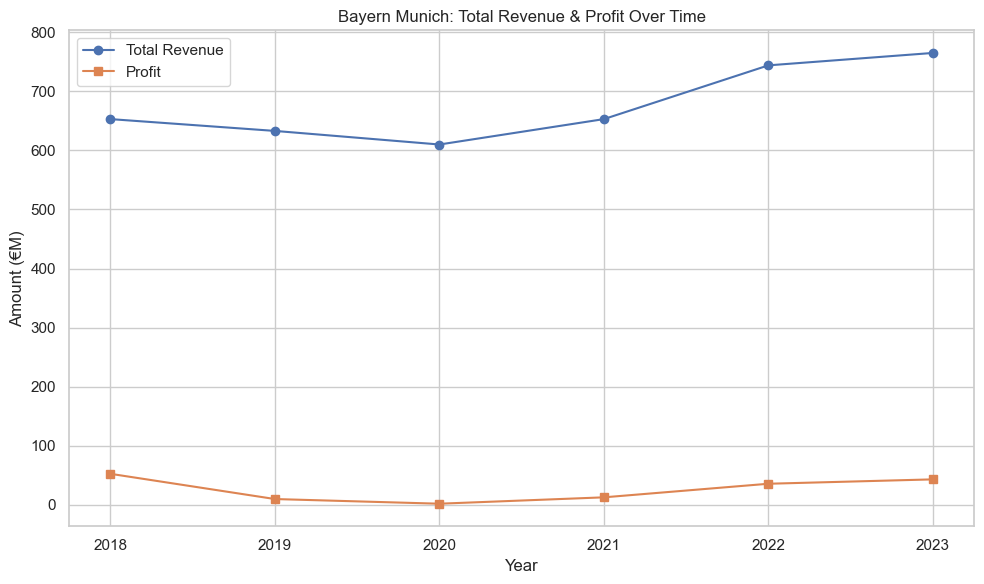

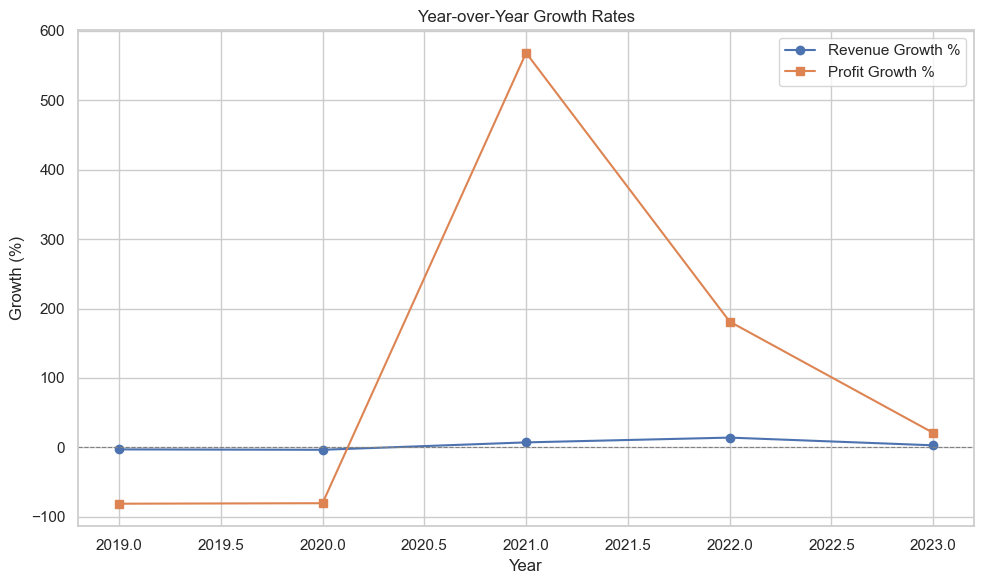

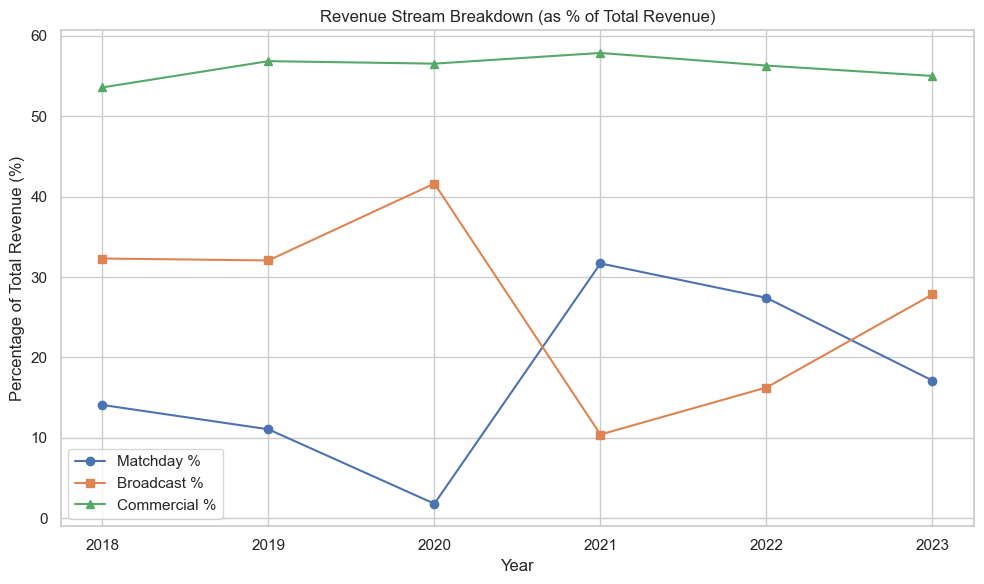

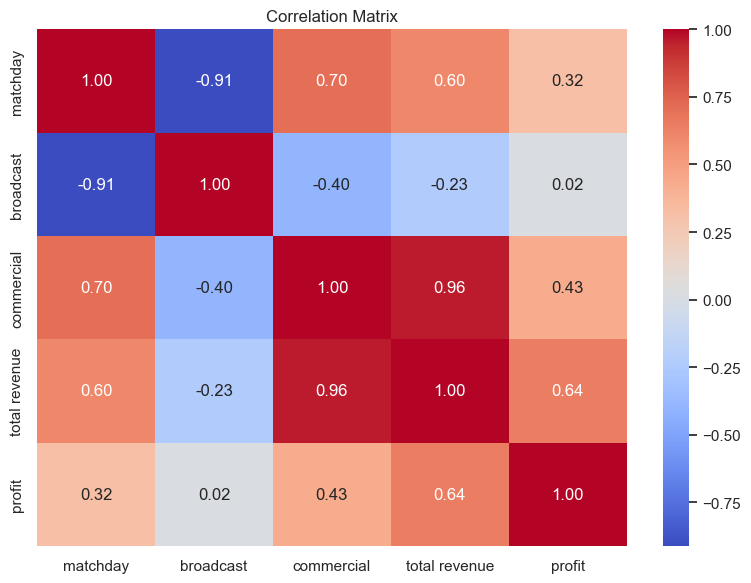

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['total revenue'], marker='o', label='Total Revenue')
plt.plot(df['year'], df['profit'], marker='s', label='Profit')
plt.title("Bayern Munich: Total Revenue & Profit Over Time")
plt.xlabel("Year")
plt.ylabel("Amount (€M)")
plt.legend()
plt.tight_layout()
plt.savefig("revenue_profit_over_time.png")
plt.show()
 
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['Revenue YoY Growth (%)'], marker='o', label='Revenue Growth %')
plt.plot(df['year'], df['Profit YoY Growth (%)'], marker='s', label='Profit Growth %')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Year-over-Year Growth Rates")
plt.xlabel("Year")
plt.ylabel("Growth (%)")
plt.legend()
plt.tight_layout()
plt.savefig("yoy_growth_rates.png")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['Matchday %'], marker='o', label='Matchday %')
plt.plot(df['year'], df['Broadcast %'], marker='s', label='Broadcast %')
plt.plot(df['year'], df['Commercial %'], marker='^', label='Commercial %')
plt.title("Revenue Stream Breakdown (as % of Total Revenue)")
plt.xlabel("Year")
plt.ylabel("Percentage of Total Revenue (%)")
plt.legend()
plt.tight_layout()
plt.savefig("revenue_stream_breakdown.png")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df[['matchday', 'broadcast', 'commercial', 'total revenue', 'profit']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("correlation_matrix.png")
plt.show()